<a href="https://colab.research.google.com/github/MinhTriLD/MinhTriLD/blob/main/Apps_for_ads_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from google.colab import files


In [ ]:
dfApp = pd.read_csv('/content/googleplaystore.csv')

In [ ]:
dfApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
dfApp.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Mean = 4.19,  almost every rating < 5, but max = 19. Maybe, there is outliner.
Check outliner through group by rating and count apps.

In [ ]:
dfRating = dfApp.groupby(['Rating'],as_index=False).agg(totalRate=('Rating','count'))
dfRating

,Rating,totalRate
0,1.0,16
1,1.2,1
2,1.4,3
3,1.5,3
4,1.6,4
5,1.7,8
6,1.8,8
7,1.9,13
8,2.0,12
9,2.1,8


There is one outliner, is rating 19 with one app. Remove this record

In [ ]:
dfApp = dfApp[dfApp['Rating']<19]

Check duplicated record

In [ ]:
dfApp[dfApp.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


There are 474 duplicated records -> remove

In [ ]:
dfApp = dfApp.drop_duplicates(keep = 'first', ignore_index=True)

Check null/NaN record

In [ ]:
dfApp[dfApp.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1276,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
3832,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
3860,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
5415,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6118,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


Remove record exist NaN

In [ ]:
dfApp=dfApp.dropna(axis=1, thresh=0)

Transform data to numerical data.

In [ ]:
dfApp['Reviews'] = dfApp['Reviews'].astype(float)

Check special characters exist in data Size

In [ ]:
dfApp["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

Besides the calculation units such K,M, column Size still exist a special string. I have to convert and remove them.
Toward string Varies with device, I replace by 0.

In [ ]:
dfApp["Size"]=dfApp["Size"].replace("Varies with device",0)

In [ ]:
dfApp.dropna(inplace=True)
dfApp=dfApp.reset_index(drop=True)

Toward K,M, I create a function to convert K to M, and remove K,M

In [ ]:
import re
def convert_reviews_k2M(size):
  if isinstance(size,str):
    value=float(re.findall(r"\d+\.*\d*",size)[0])
    unit=size[-1]
    if unit=="M":
      return value
    elif unit=="k":
      return value*0.001
    raise ValueError("Invalid Size Format")

In [ ]:
converted_sizes=[]
for size in dfApp["Size"].tolist():
    converted_size=convert_reviews_k2M(size)
    converted_sizes.append(converted_size)

dfApp["Size"] = pd.DataFrame({"Converted Size (MB)": converted_sizes})

Toward columns Installs and Price, I remove special character and transform data type

In [ ]:
cols=["Installs","Price"]
signs=["+",",","$"]

for col in cols:
  for sign in signs:
    dfApp[col]=dfApp[col].apply(lambda x:x.replace(sign,""))

In [ ]:
dfApp["Reviews"]=dfApp["Reviews"].astype(float)
dfApp["Installs"]=dfApp["Installs"].astype(float)
dfApp["Price"]=dfApp["Price"].astype(float)
dfApp["Size"]=dfApp["Size"].astype(float)

In [ ]:
dfApp = dfApp.groupby('App',as_index=False).agg(Rating=('Rating','max'),
                                                Reviews=('Reviews','max'),Installs=('Installs','max'),
                                                Price=('Price','max'),
                                                Last_Updated=('Last Updated','max'),
                                                Category=('Category','max'),
                                                Size=('Size','max'),
                                                Content_Rating=('Content Rating','max'),
                                                Type=('Type','max'),
                                                Android_Ver=('Android Ver','max'),
                                                Current_Ver=('Current Ver','max'),
                                                Genres=('Genres','max'))

In [ ]:
dfApp['Content Rating']=dfApp['Content_Rating']
dfApp['Android Ver']=dfApp['Android_Ver']
dfApp['Last Updated']=dfApp['Last_Updated']
dfApp['Current Ver']=dfApp['Current_Ver']
dfApp=dfApp.drop(["Content_Rating","Android_Ver","Last_Updated"], axis=1)

I transform column Last Updated to recent. This dataset is released by the end of 2018. So timeline is determined on Dec 31,2018.
Firstly, I transform current datatype to datetime type.

In [ ]:
dfApp['Last Updated'] = pd.to_datetime(dfApp['Last Updated'], format='%B %d, %Y')

In [ ]:
from datetime import datetime
date = datetime(2018,12,31)

In [ ]:
length = len(dfApp)
for i in range(length):
  dfApp.loc[i,'Last Updated']= (date - dfApp.loc[i,'Last Updated']).days

In [ ]:
dfApp["Last Updated"]=dfApp["Last Updated"].astype(float)

In [ ]:
dfApp.describe()

,Rating,Reviews,Installs,Price,Size,Last Updated
count,8190.000000,8.190000e+03,8.190000e+03,8190.000000,7023.000000,8190.000000
mean,4.173651,2.556849e+05,9.195983e+06,1.038342,21.766830,420.742857
std,0.536456,1.986425e+06,5.828358e+07,16.864040,22.730035,411.131068
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.008500,145.000000
25%,4.000000,1.270000e+02,1.000000e+04,0.000000,4.900000,165.000000
50%,4.300000,3.020000e+03,1.000000e+05,0.000000,13.000000,225.000000
75%,4.500000,4.405325e+04,1.000000e+06,0.000000,31.000000,501.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,100.000000,3146.000000


In [ ]:
dfApp['Size_level'] = dfApp['Size']
for i in range(len(dfApp['Size_level'])):
  if float(dfApp.loc[i,'Size_level']) <5:
    dfApp.loc[i,'Size_level'] = 1
  elif float(dfApp.loc[i,'Size_level'])<10:
    dfApp.loc[i,'Size_level'] = 2
  elif float(dfApp.loc[i,'Size_level'])<50:
    dfApp.loc[i,'Size_level'] =3
  elif float(dfApp.loc[i,'Size_level'])<100:
    dfApp.loc[i,'Size_level'] = 4
  else:
    dfApp.loc[i,'Size_level'] = 5
print(dfApp['Size_level'])

0       3.0
1       2.0
2       1.0
3       4.0
4       3.0
       ... 
8185    3.0
8186    3.0
8187    3.0
8188    1.0
8189    1.0
Name: Size_level, Length: 8190, dtype: float64


In [ ]:
dfApp['Reviews_level'] = dfApp['Reviews']
for i in range(len(dfApp['Reviews_level'])):
  if float(dfApp.loc[i,'Reviews_level']) <10000:
    dfApp.loc[i,'Reviews_level'] = 1
  elif float(dfApp.loc[i,'Reviews_level'])<=100000:
    dfApp.loc[i,'Reviews_level'] = 2
  elif float(dfApp.loc[i,'Reviews_level'])<=500000:
    dfApp.loc[i,'Reviews_level'] = 3
  elif float(dfApp.loc[i,'Reviews_level'])<=1000000:
    dfApp.loc[i,'Reviews_level'] = 4
  else:
    dfApp.loc[i,'Reviews_level'] = 5
print(dfApp['Reviews_level'])

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
8185    1.0
8186    1.0
8187    2.0
8188    1.0
8189    2.0
Name: Reviews_level, Length: 8190, dtype: float64


In [ ]:
dfApp['Price_Segment'] = dfApp['Price']
for i in range(len(dfApp['Price_Segment'])):
  if float(dfApp.loc[i,'Price_Segment']) == 0:
    dfApp.loc[i,'Price_Segment'] = 1
  elif float(dfApp.loc[i,'Price_Segment'])<20:
    dfApp.loc[i,'Price_Segment'] = 2
  elif float(dfApp.loc[i,'Price_Segment'])<100:
    dfApp.loc[i,'Price_Segment'] = 3

  else:
    dfApp.loc[i,'Price_Segment'] = 4
print(dfApp['Price_Segment'])

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
8185    1.0
8186    4.0
8187    1.0
8188    1.0
8189    1.0
Name: Price_Segment, Length: 8190, dtype: float64


In [ ]:
dfApp['Install_Level']=dfApp['Installs']
for i in range(len(dfApp['Install_Level'])):
  if 0<=float(dfApp.loc[i,'Install_Level'])<10000:
    dfApp.loc[i,'Install_Level'] = 1
  elif 10000<=float(dfApp.loc[i,'Install_Level'])<100000:
    dfApp.loc[i,'Install_Level'] = 2
  elif 100000<=float(dfApp.loc[i,'Install_Level'])<1000000:
    dfApp.loc[i,'Install_Level'] = 3
  elif 1000000<=float(dfApp.loc[i,'Install_Level'])<10000000:
    dfApp.loc[i,'Install_Level'] = 4
  elif 10000000<=float(dfApp.loc[i,'Install_Level'])<100000000:
    dfApp.loc[i,'Install_Level'] = 5
  elif 100000000<=float(dfApp.loc[i,'Install_Level'])<1000000000:
    dfApp.loc[i,'Install_Level'] = 6
  else:
    dfApp.loc[i,'Install_Level'] = 7
print(dfApp['Install_Level'])

0       4.0
1       2.0
2       2.0
3       2.0
4       1.0
       ... 
8185    2.0
8186    2.0
8187    4.0
8188    2.0
8189    4.0
Name: Install_Level, Length: 8190, dtype: float64


In [ ]:
dfApp['Rating_Level']=dfApp['Rating']
for i in range(len(dfApp['Rating_Level'])):
  if 0.0<=float(dfApp.loc[i,'Rating_Level'])<1.0:
    dfApp.loc[i,'Rating_Level'] = 1
  elif 1.0<=float(dfApp.loc[i,'Rating_Level'])<2.4:
    dfApp.loc[i,'Rating_Level'] = 2
  elif 2.4<=float(dfApp.loc[i,'Rating_Level'])<=2.6:
    dfApp.loc[i,'Rating_Level'] = 3
  elif 2.6<float(dfApp.loc[i,'Rating_Level'])<=4.0:
    dfApp.loc[i,'Rating_Level'] = 4
  else:
    dfApp.loc[i,'Rating_Level'] = 5
print(dfApp['Rating_Level'])

0       5.0
1       4.0
2       5.0
3       5.0
4       5.0
       ... 
8185    5.0
8186    4.0
8187    5.0
8188    4.0
8189    5.0
Name: Rating_Level, Length: 8190, dtype: float64


In [ ]:
dfApp.to_csv('dfApp.csv',index = False)
files.download('dfApp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EXPLORATORY DATA ANALYSIS by chart

Fristly, I remove column App, because the name is invalid value.

In [ ]:

 dfApp=dfApp.drop(["App","Current_Ver"], axis=1)

In [ ]:
categorical_columns = dfApp.select_dtypes(exclude="number").columns
numerical_columns = dfApp.select_dtypes(include="number").columns

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

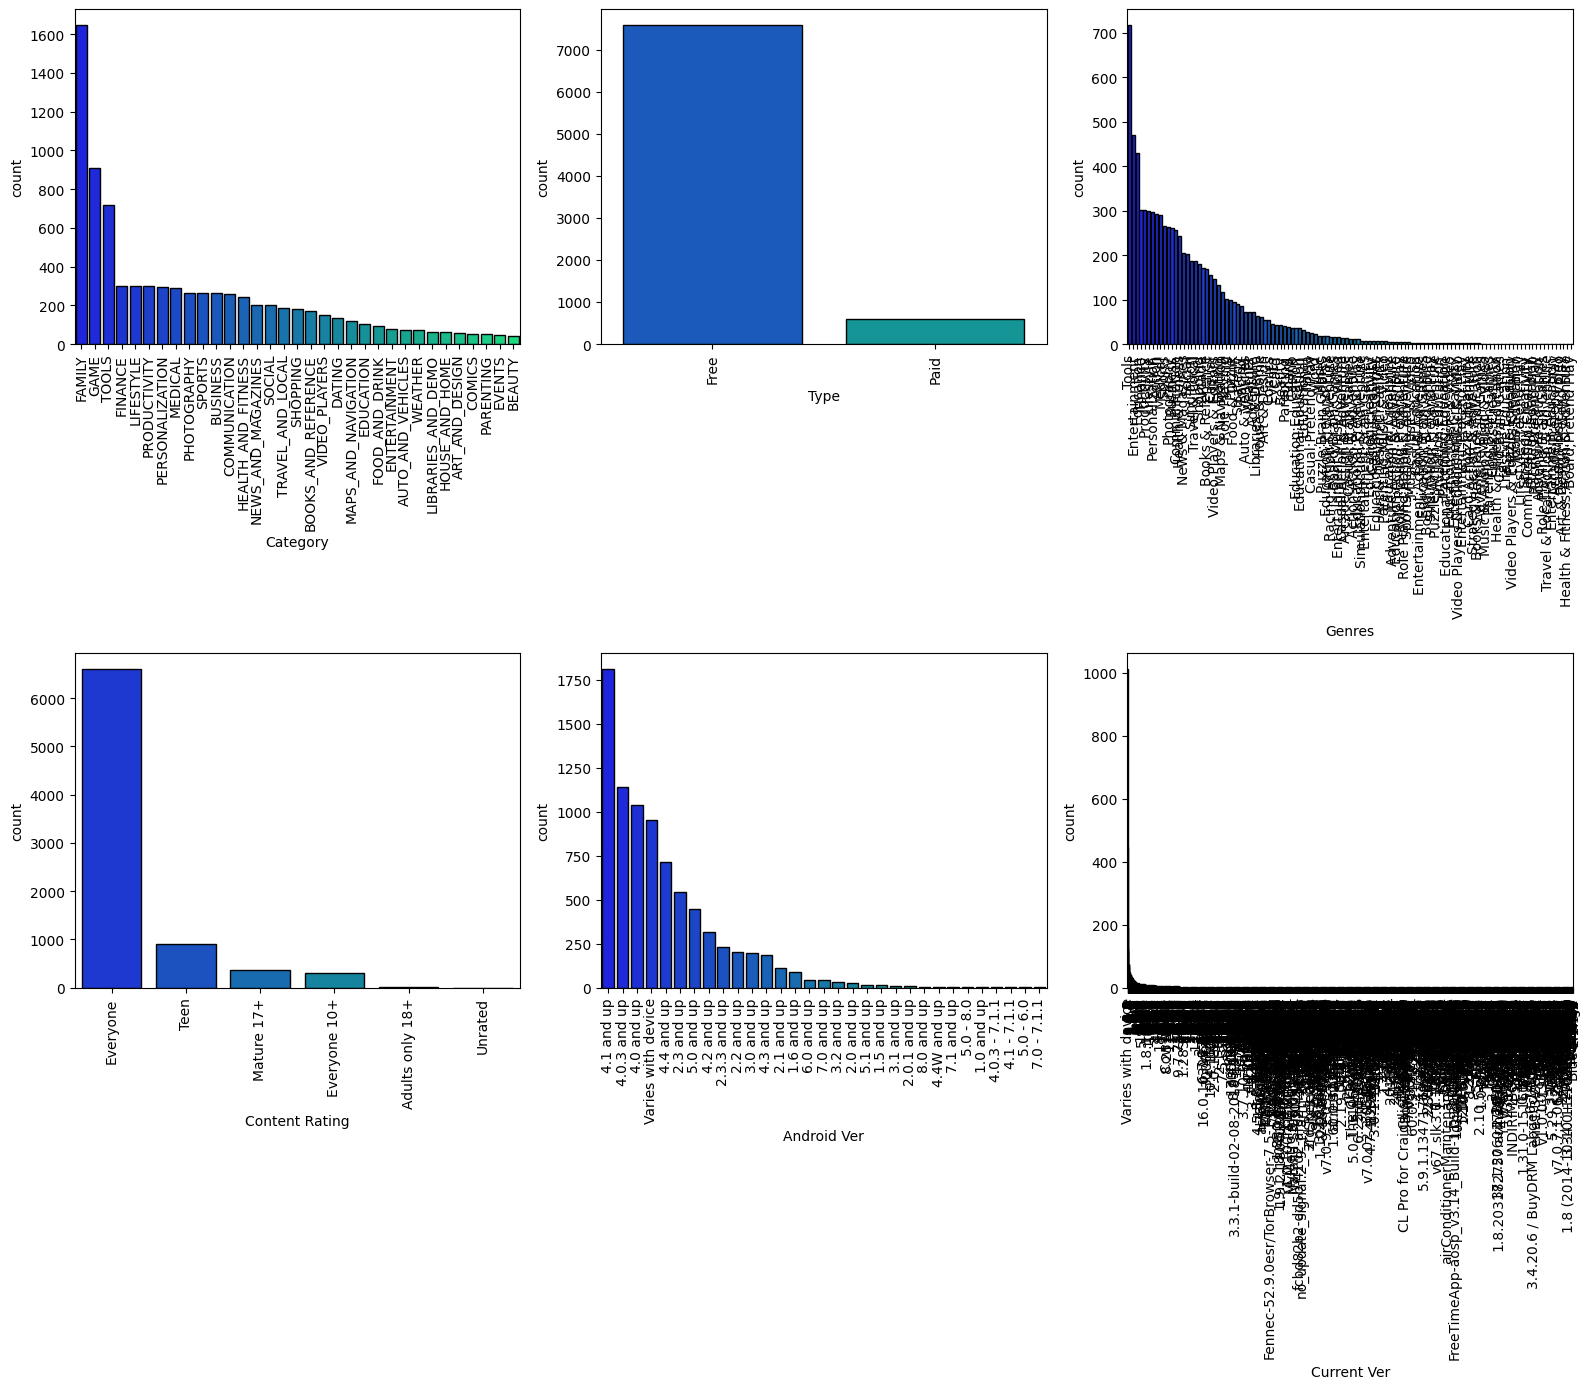

In [ ]:
figuresize = (16, 14)
cols = 3
rows = math.ceil(len(categorical_columns) / cols)

plt.subplots(rows, cols, figsize=figuresize)
for i in range(1, len(categorical_columns) + 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=categorical_columns[i-1], data=dfApp, palette='winter', edgecolor='black', order=dfApp[categorical_columns[i-1]].value_counts().index)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

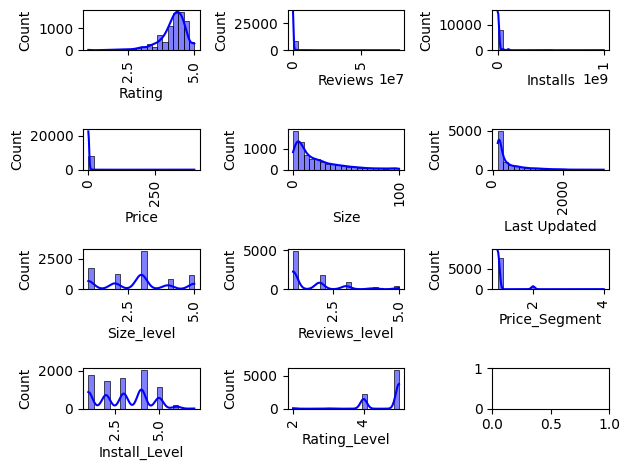

In [ ]:
cols = 3
rows = math.ceil(len(numerical_columns) / cols)

plt.subplots(rows, cols)
for i in range(1, len(numerical_columns) + 1):
    plt.subplot(rows, cols, i)
    sns.histplot(dfApp[numerical_columns[i-1]], color='blue', edgecolor='black', kde=True, bins=20)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<ipython-input-297-1d265b3f4f89>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfApp.corr(), annot=True, cmap="winter", linewidths=0.2)


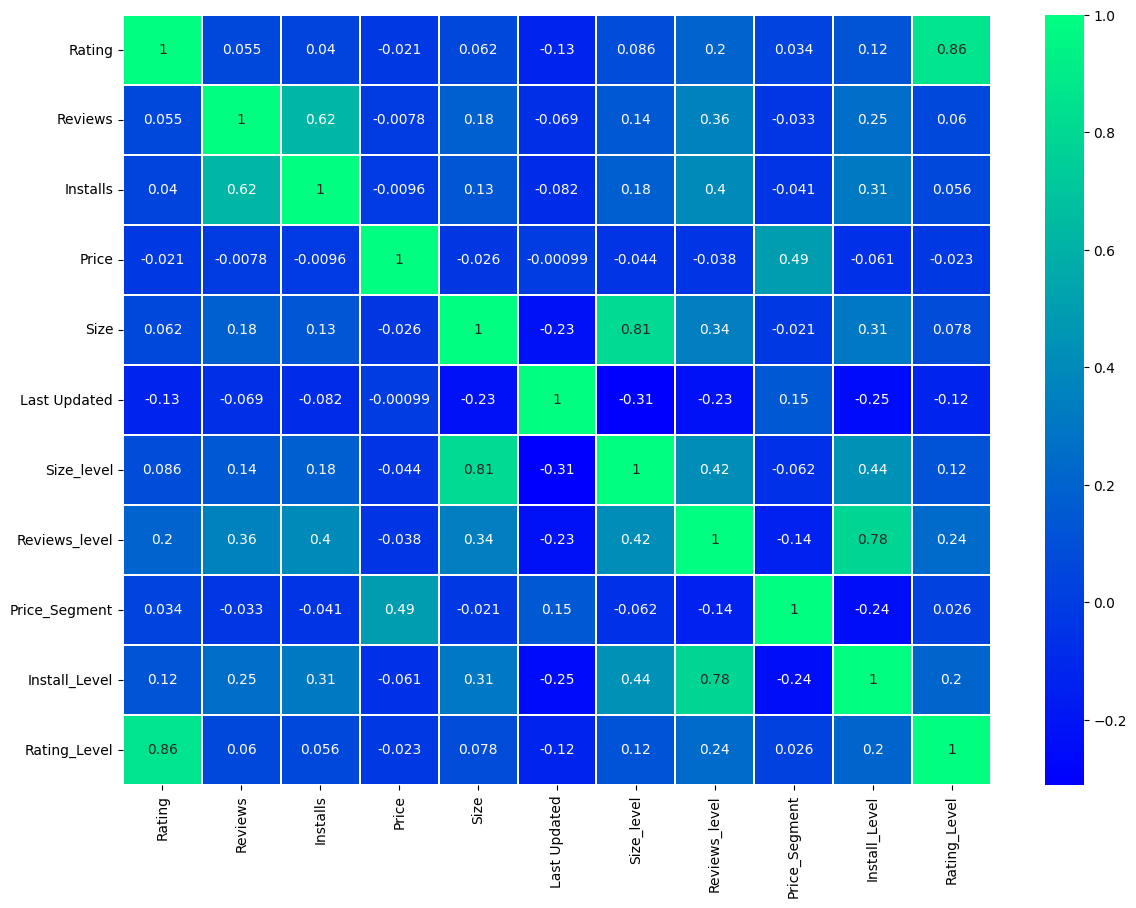

In [ ]:
sns.heatmap(dfApp.corr(), annot=True, cmap="winter", linewidths=0.2)
plt.gcf().set_size_inches(14, 10)

plt.show()

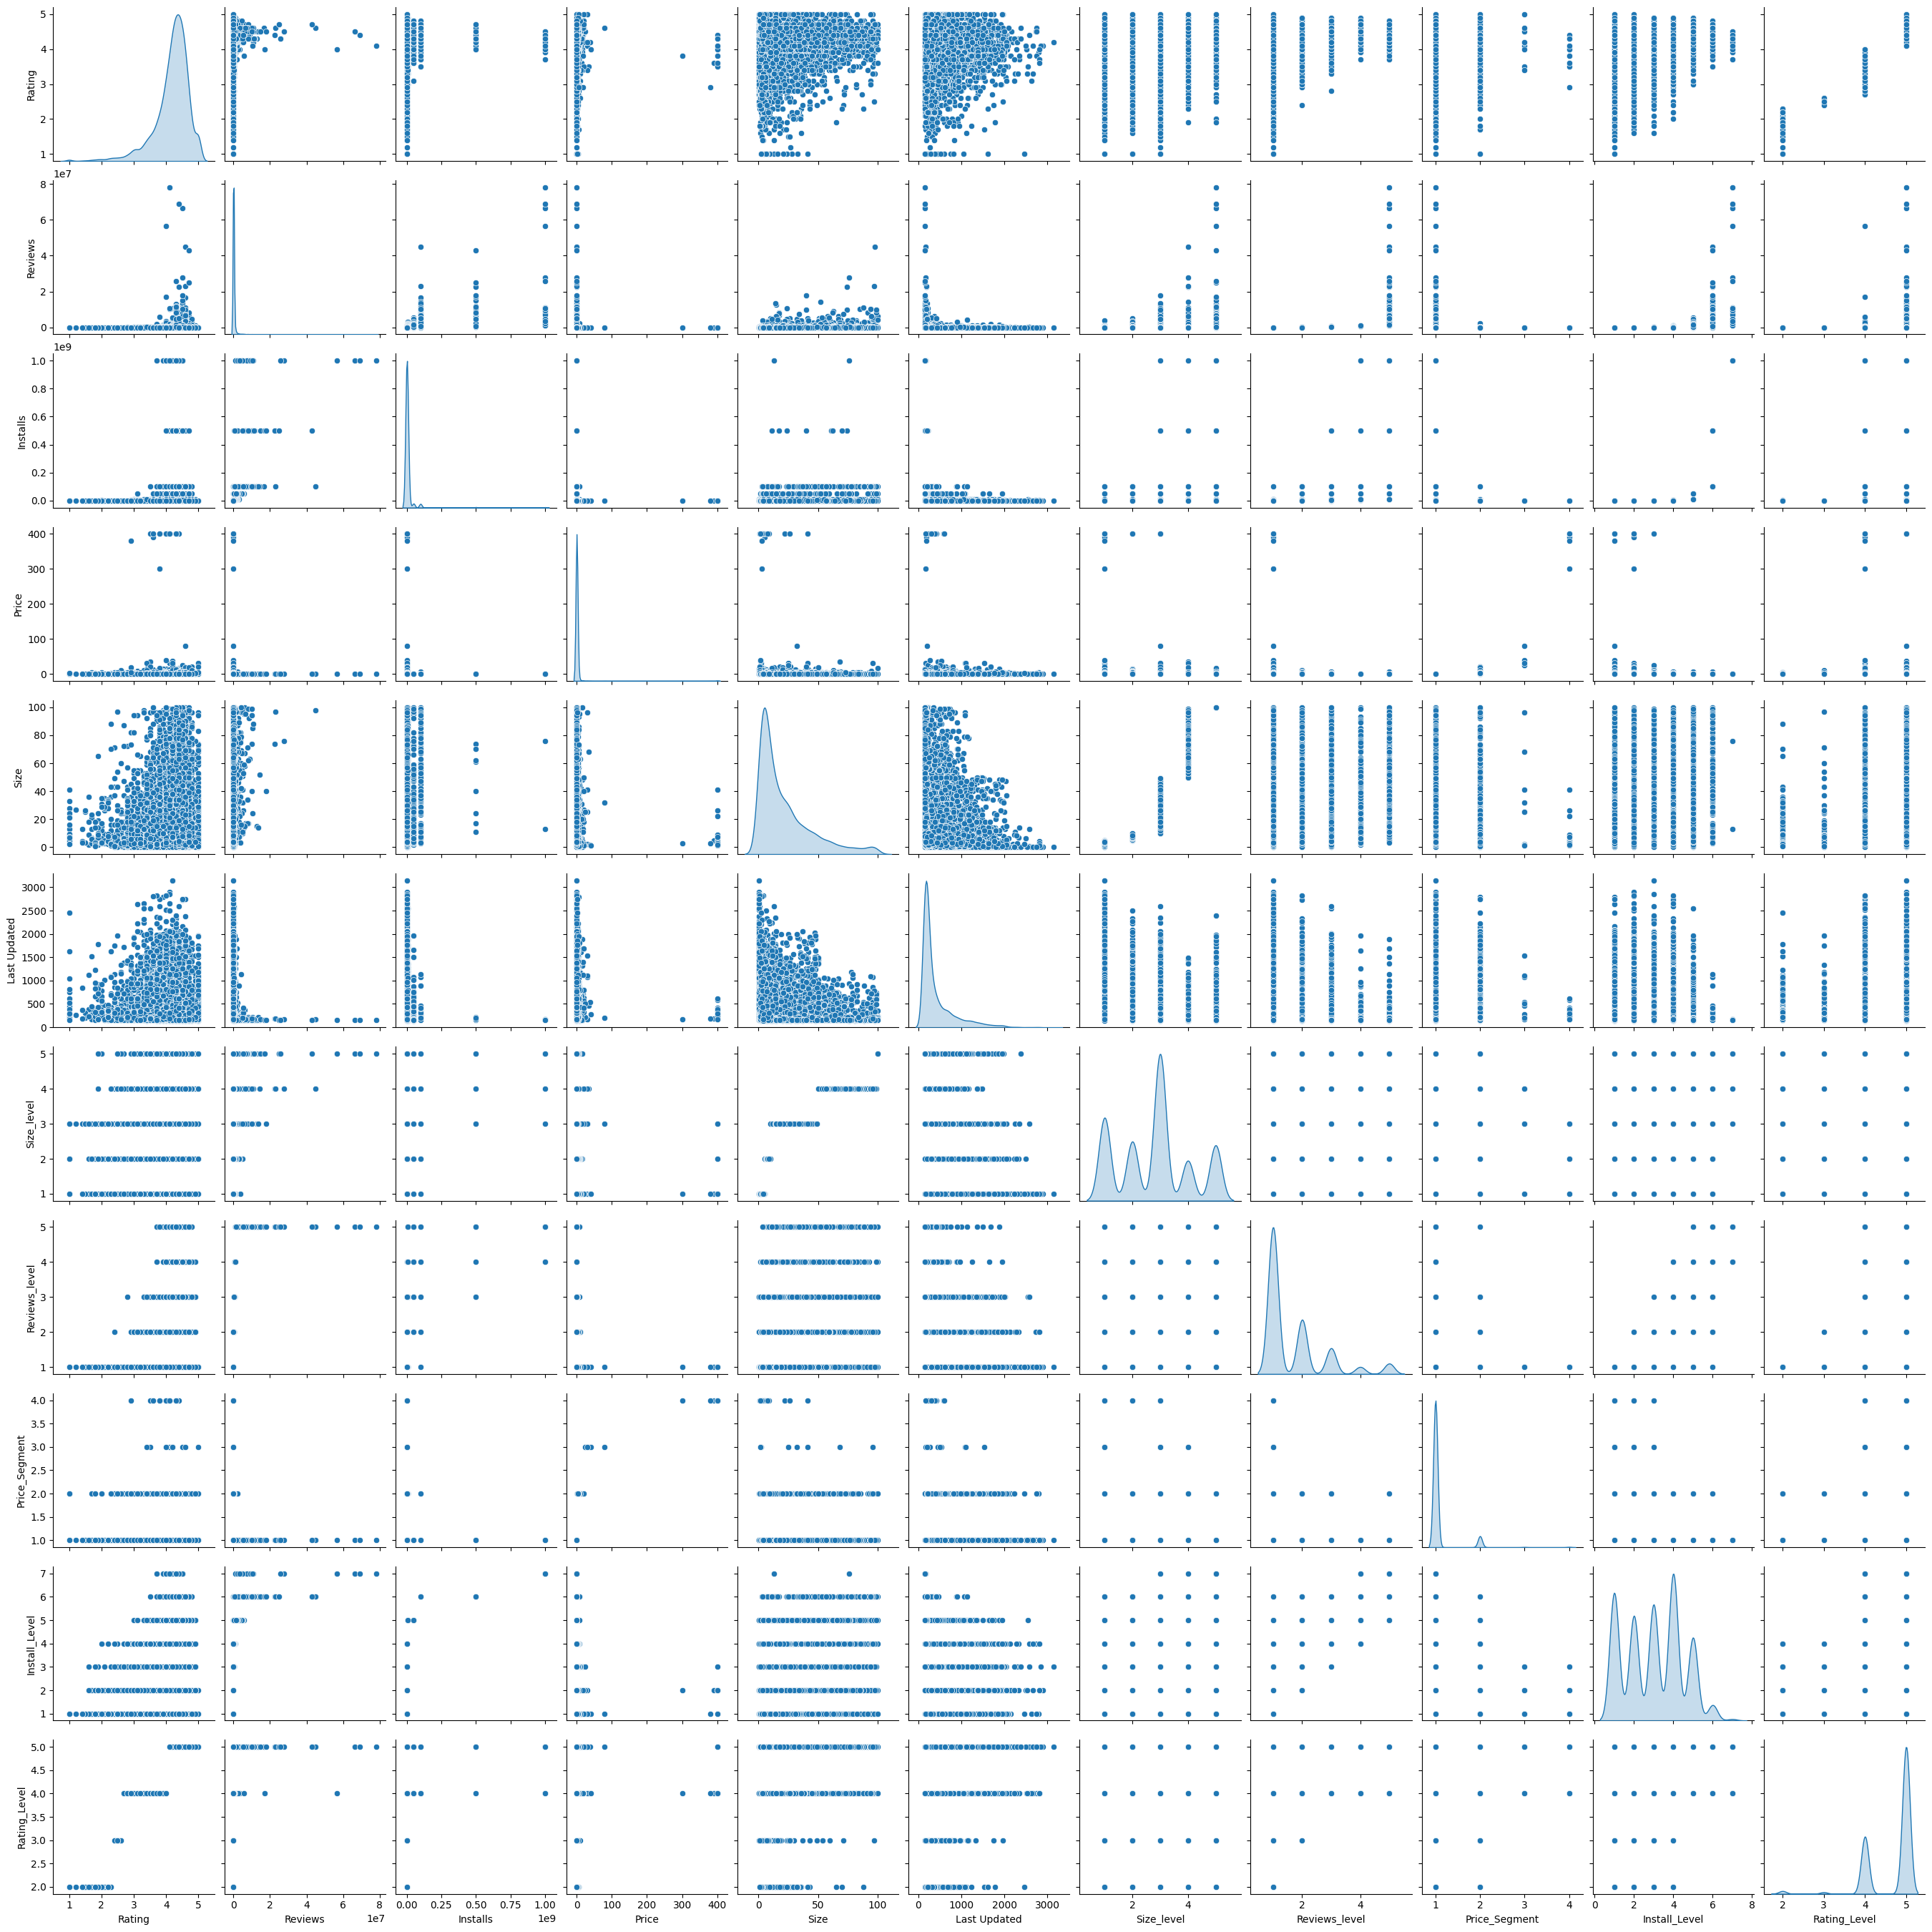

In [ ]:
# pairplot
sns.pairplot(dfApp, diag_kind="kde")
plt.show()

<ipython-input-299-2a953ef56913>:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


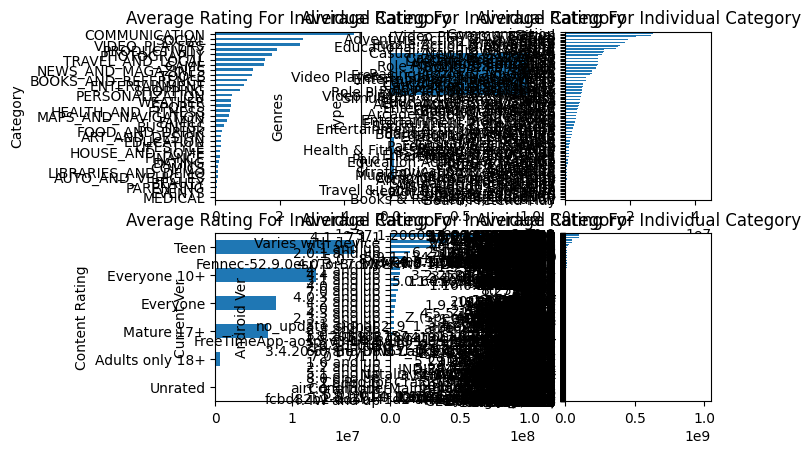

In [ ]:
cols = 3
rows = math.ceil(len(categorical_columns) / cols)

plt.subplots(rows, cols)
for i in range(1, len(categorical_columns) + 1):
    plt.subplot(rows, cols, i)

    dfApp.groupby(categorical_columns[i-1])["Installs"].mean().sort_values().plot(kind="barh")
    plt.title("Average Rating For Individual Category")

plt.tight_layout()
plt.show()

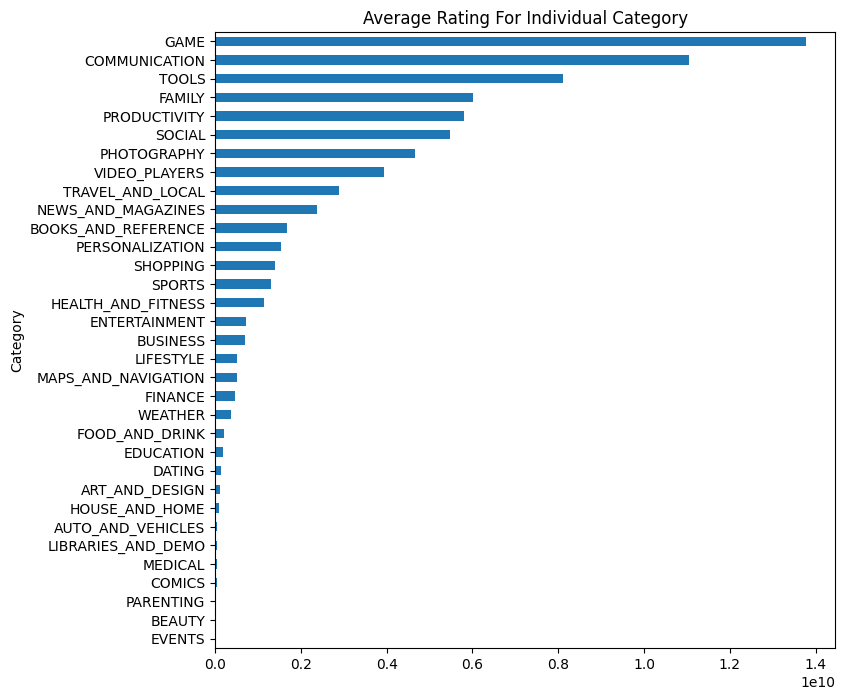

In [ ]:
plt.figure(figsize=(8,8))
dfApp.groupby("Category")["Installs"].sum().sort_values().plot(kind="barh")
plt.title("Average Rating For Individual Category")
plt.show()

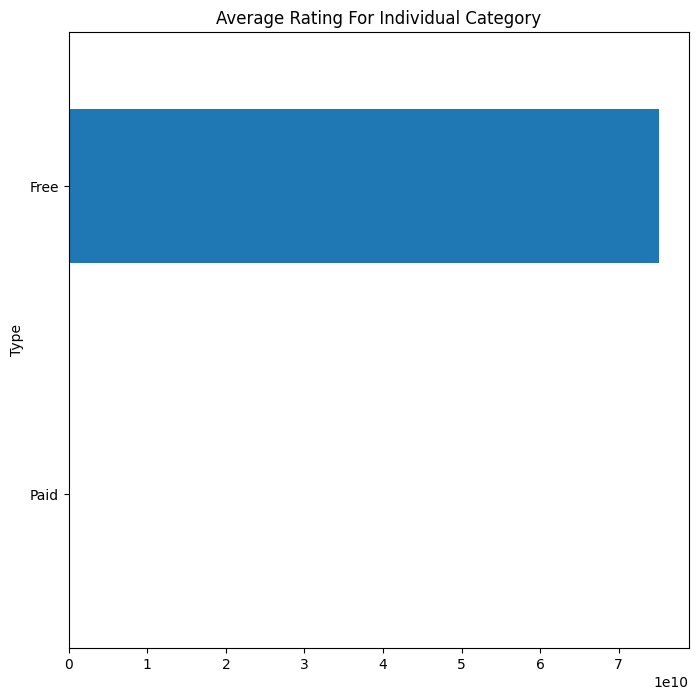

In [ ]:
plt.figure(figsize=(8,8))
dfApp.groupby("Type")["Installs"].sum().sort_values().plot(kind="barh")
plt.title("Average Rating For Individual Category")
plt.show()

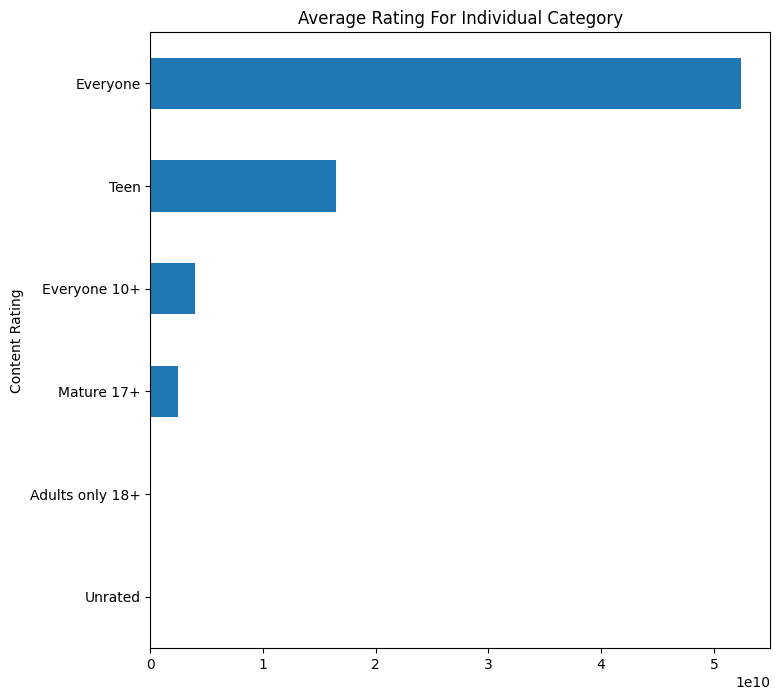

In [ ]:
plt.figure(figsize=(8,8))
dfApp.groupby("Content Rating")["Installs"].sum().sort_values().plot(kind="barh")
plt.title("Average Rating For Individual Category")
plt.show()

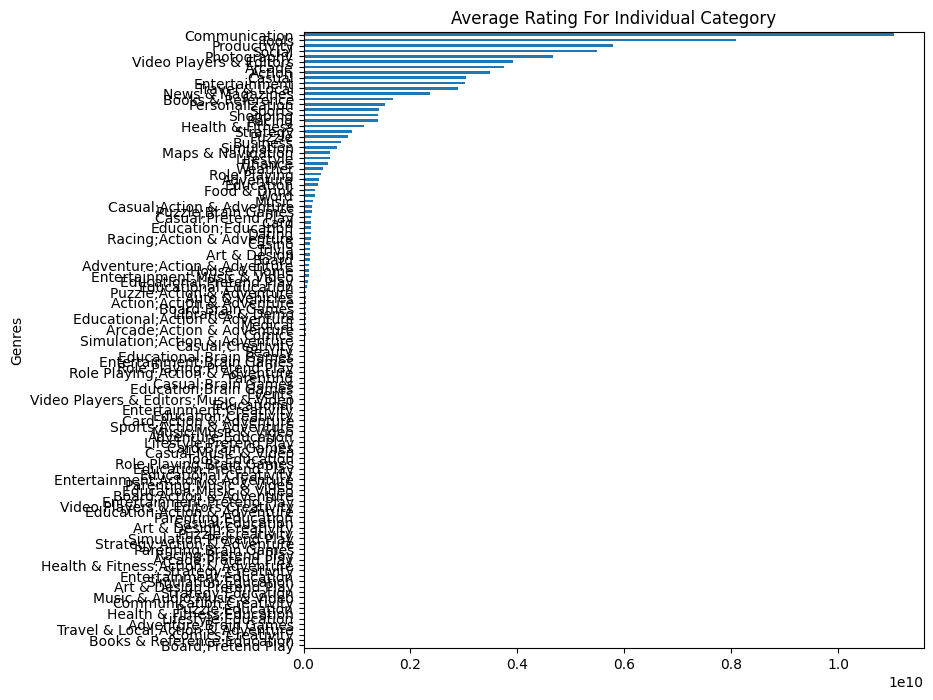

In [ ]:
plt.figure(figsize=(8,8))
dfApp.groupby("Genres")["Installs"].sum().sort_values().plot(kind="barh")
plt.title("Average Rating For Individual Category")
plt.show()

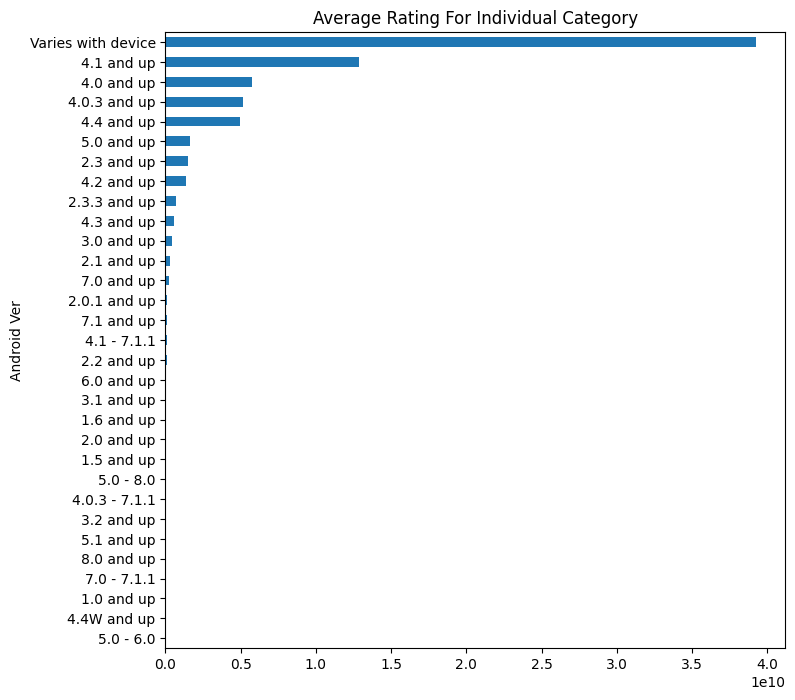

In [ ]:
plt.figure(figsize=(8,8))
dfApp.groupby("Android Ver")["Installs"].sum().sort_values().plot(kind="barh")
plt.title("Average Rating For Individual Category")
plt.show()

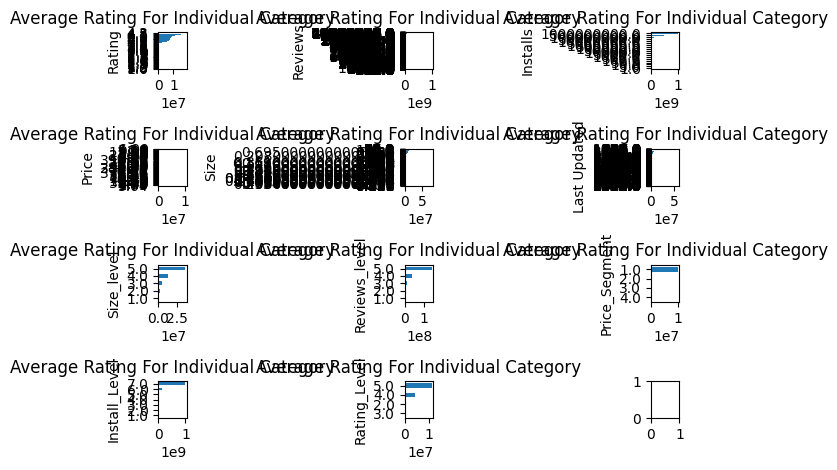

In [ ]:
cols = 3
rows = math.ceil(len(numerical_columns) / cols)

plt.subplots(rows, cols)
for i in range(1, len(numerical_columns) + 1):
    plt.subplot(rows, cols, i)

    dfApp.groupby(numerical_columns[i-1])["Installs"].mean().sort_values().plot(kind="barh")
    plt.title("Average Rating For Individual Category")

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
print("Average Rating",dfApp["Rating"].mean())
fig=px.histogram(dfApp,x="Rating",y="Installs",text_auto=True)
fig.show()

Average Rating 4.173650793650793


In [ ]:
print("Average Rating",dfApp["Rating"].mean())
fig=px.histogram(dfApp,x="Reviews",y="Installs",text_auto=True)
fig.show()

Average Rating 4.173650793650793


In [ ]:
print("Average Rating",dfApp["Rating"].mean())
fig=px.histogram(dfApp,x="Price",y="Installs",text_auto=True)
fig.show()

Average Rating 4.173650793650793


In [ ]:
print("Average Rating",dfApp["Rating"].mean())
fig=px.histogram(dfApp,x="Size",y="Installs",text_auto=True)
fig.show()

Average Rating 4.173650793650793


In [ ]:
print("Average Rating",dfApp["Rating"].mean())
fig=px.histogram(dfApp,x="Last Updated",y="Installs",text_auto=True)
fig.show()

Average Rating 4.173650793650793
